## Coding Complex Data

### deep_circles.py

Defines a network that can find separate circles of data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

### Helper Functions

#### Plotting the Data on the Figure 

In [3]:
def plot_data(pl, X, y):
    
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    
    pl.legend(['0', '1'])
    
    return pl

#### Drawing Decision Boundaries

In [4]:
def plot_decision_boundary(model, X, y):
    
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model
    c = model.predict(ab)
    
    # reshape the output so contourf can plot it
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    
    # plot the contour instead of just the line
    # allows us to see the confidence of the prediction
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    
    # plot the moons of data
    plot_data(plt, X, y)
    
    return plt

### Generating Data Circles



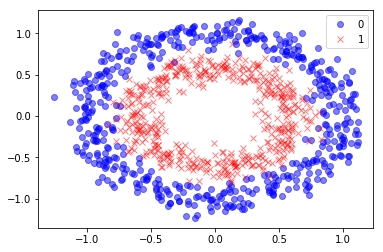

In [5]:
X, y = make_circles(n_samples=1000, factor=.6, \
                    noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

### Splitting Data into Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating the Keras Model


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))


# Compile and fit the model
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=1)

Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
700/700 [==============================] - 0s 419us/step - loss: 0.7246 - acc: 0.4871
Epoch 2/100
700/700 [==============================] - 0s 47us/step - loss: 0.6974 - acc: 0.5400
Epoch 3/100
700/700 [==============================] - 0s 47us/step - loss: 0.6947 - acc: 0.5457
Epoch 4/100
700/700 [==============================] - 0s 47us/step - loss: 0.6967 - acc: 0.5900
Epoch 5/100
700/700 [==============================] - 0s 49us/step - loss: 0.6947 - acc: 0.5029
Epoch 6/100
700/700 [==============================] - 0s 48us/step - loss: 0.6948 - acc: 0.5529
Epoch 7/100
700/700 [==============================] - 0s 50us/step - loss: 0.6946 - acc: 0.5557
Epoch 8/100
700/700 [==============================] - 0s 50us/step - loss: 0.6944 - acc: 0.5071
Epoch 9/100
700/700 [==============================] - 0s 48us/step - loss: 0.6969 - acc: 0.5343
Epoch 10/100
700/700 [==============================]

700/700 [==============================] - 0s 41us/step - loss: 0.6960 - acc: 0.4314
Epoch 81/100
700/700 [==============================] - 0s 43us/step - loss: 0.6969 - acc: 0.5257
Epoch 82/100
700/700 [==============================] - 0s 44us/step - loss: 0.6971 - acc: 0.4386
Epoch 83/100
700/700 [==============================] - 0s 40us/step - loss: 0.6958 - acc: 0.4943
Epoch 84/100
700/700 [==============================] - 0s 39us/step - loss: 0.6946 - acc: 0.5457
Epoch 85/100
700/700 [==============================] - 0s 40us/step - loss: 0.6963 - acc: 0.5243
Epoch 86/100
700/700 [==============================] - 0s 41us/step - loss: 0.6943 - acc: 0.5143
Epoch 87/100
700/700 [==============================] - 0s 41us/step - loss: 0.6974 - acc: 0.4814
Epoch 88/100
700/700 [==============================] - 0s 41us/step - loss: 0.6944 - acc: 0.5371
Epoch 89/100
700/700 [==============================] - 0s 40us/step - loss: 0.6959 - acc: 0.4943
Epoch 90/100
700/700 [===========

### Get Loss and Accuracy


In [8]:
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest loss:", eval_result[0], "\nTest accuracy:", eval_result[1])

300/300 [==============================] - 0s 76us/step


Test loss: 0.6949479047457378 
Test accuracy: 0.5333333341280619


### Plot the Decision Boundary

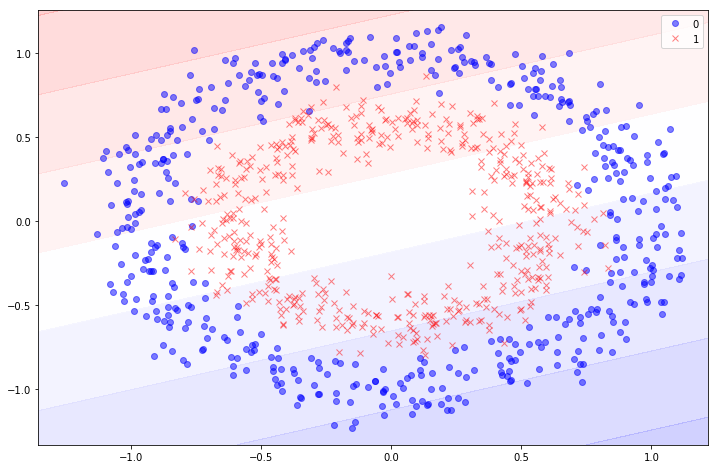

In [9]:
plot_decision_boundary(model, X, y).show()

**This data is not linearly separable, so we have to use a different approach.** Fitting a plane through this data only leads to about 50% accuracy.

--------


## Estimating Layers and Neurons

### Rules of Thumb for Starting Number of Hidden Layers

Unfortunately, there are no absolute rules since the best values are related to the data and how much training is done with the data.

[Guidelines](http://www.heatonresearch.com/2017/06/01/hidden-layers.html) come from Jeff Heaton



![Layers](Images/03_02.jpg) 

For our data, more than two layers is probably overkill.


-----


### Rules of Thumb for Starting Number of Neurons in Hidden Layers


![Neurons](Images/03_03.jpg) 

Our input contains two values, the x and y for each item's position, and the output size is 1, the class 0 or 1 of each item. Applying these rules, we get starting points ranging from 2 to 4 neurons. 

More neurons are usually better until the network starts overfitting the data.

We are going to start with 4 neurons for each of our 2 hidden layers.


-------


## Implementing Layers and Neurons

Since we are using the sequential model, adding these layers is easy. 

The first layer must define the size of the input data. Once we do that, the sequential model will infer the input sizes of the remaining layers. So we move the input size to the new first layer.



In [10]:
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation="tanh"))
model.add(Dense(4, activation="tanh"))

model.add(Dense(1, activation='sigmoid'))

# Compile and fit the model
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
700/700 [==============================] - 0s 609us/step - loss: 0.6998 - acc: 0.4986
Epoch 2/100
700/700 [==============================] - 0s 53us/step - loss: 0.6778 - acc: 0.5943
Epoch 3/100
700/700 [==============================] - 0s 56us/step - loss: 0.6378 - acc: 0.6543
Epoch 4/100
700/700 [==============================] - 0s 53us/step - loss: 0.5939 - acc: 0.6900
Epoch 5/100
700/700 [==============================] - 0s 54us/step - loss: 0.5662 - acc: 0.6957
Epoch 6/100
700/700 [==============================] - 0s 56us/step - loss: 0.4916 - acc: 0.7914
Epoch 7/100
700/700 [==============================] - 0s 53us/step - loss: 0.3469 - acc: 0.8843
Epoch 8/100
700/700 [==============================] - 0s 57us/step - loss: 0.2261 - acc: 0.9300
Epoch 9/100
700/700 [==============================] - 0s 56us/step - loss: 0.1426 - acc: 0.9629
Epoch 10/100
700/700 [==============================] - 0s 53us/step - loss: 0.1343 - acc: 0.9529
Epoch 11/100
700/700 [======

700/700 [==============================] - 0s 46us/step - loss: 0.0808 - acc: 0.9729
Epoch 85/100
700/700 [==============================] - 0s 48us/step - loss: 0.1041 - acc: 0.9600
Epoch 86/100
700/700 [==============================] - 0s 48us/step - loss: 0.0804 - acc: 0.9671
Epoch 87/100
700/700 [==============================] - 0s 47us/step - loss: 0.0785 - acc: 0.9686
Epoch 88/100
700/700 [==============================] - 0s 48us/step - loss: 0.0672 - acc: 0.9757
Epoch 89/100
700/700 [==============================] - 0s 49us/step - loss: 0.1117 - acc: 0.9529
Epoch 90/100
700/700 [==============================] - 0s 49us/step - loss: 0.0713 - acc: 0.9743
Epoch 91/100
700/700 [==============================] - 0s 47us/step - loss: 0.0548 - acc: 0.9814
Epoch 92/100
700/700 [==============================] - 0s 48us/step - loss: 0.0588 - acc: 0.9786
Epoch 93/100
700/700 [==============================] - 0s 48us/step - loss: 0.0588 - acc: 0.9729
Epoch 94/100
700/700 [===========

### Get Loss and Accuracy

In [11]:
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest loss:", eval_result[0], "\nTest accuracy:", eval_result[1])

300/300 [==============================] - 0s 116us/step


Test loss: 0.12048892876754204 
Test accuracy: 0.9466666666666667


### Plot the Decision Boundary

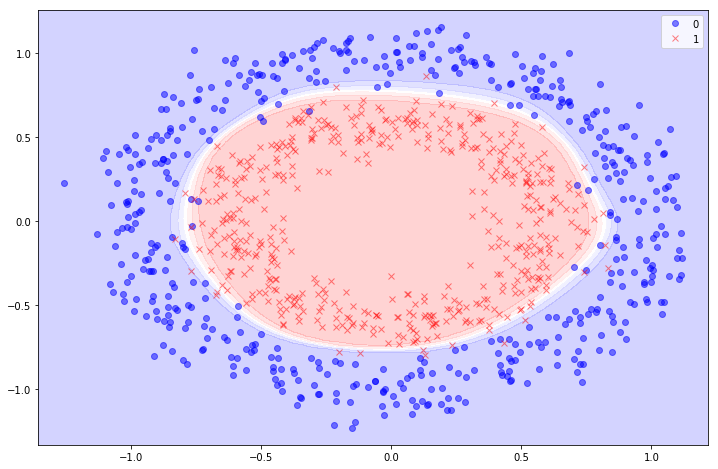

In [12]:
plot_decision_boundary(model, X, y).show()